### Цели исследования

Давно известно, что уровень образования человека имеет большое влияние на уровень его дохода. Но какова сила этого влияния? Как прочие демографические характеристики, например, пол оказывают влияние на взаимосвязь образования и дохода?

__Основная цель: Изучить взаимосвязь между уровнем образования человека и его доходом (в развитых экономиках)__

__Дополнительная цель: Изучить то, как пол влияет на зависимость дохода от уровня образования__

### Используемые библиотеки:

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import scipy.stats as st
random_state = 9

In [108]:
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6)

### Данные

Есть такой сайт: IPUMS international (https://international.ipums.org/international/), который под началом униерситета Миннесоты занимается сбором и публикацией данных переписей населения. 

Возьмём данные переписи США 2015 года, поскольку США - является страной с развитой экономикой(а именно в контексте такой экономики мы бы хотели проводить исследование) и в вопросах переписи находятся все ключевые для этого исследования данные (доход/ образование/ пол/ семейное положение)

Скачаем данные по полу, возрасту, доходу, семейному положению, количеству детей и часам работы в неделю

In [2]:
df_dem = pd.read_csv('https://github.com/AleksVart/AndanProject/raw/main/US_2015.csv', sep = ';')

### Обзор данных

In [3]:
df_dem

,US2015A_EDUC,US2015A_INCTOT,US2015A_SEX,US2015A_AGE,US2015A_NCHILD,US2015A_MARST,US2015A_UHRSWORK
0,50,3450,1,56,0,1,5
1,71,14000,2,61,0,1,0
2,15,9999999,2,8,0,6,0
3,71,35000,1,61,0,4,40
4,26,8800,2,52,0,4,0
...,...,...,...,...,...,...,...
1048570,50,0,1,18,0,6,0
1048571,65,21400,1,61,1,1,20
1048572,81,54000,2,50,1,1,40
1048573,63,17900,1,19,0,6,29


In [10]:
df_dem.columns = ['EDUC','INCTOT','SEX', 'AGE', 'NCHILD', 'MARST', 'UHRSWORK' ] # переименуем колонки

In [11]:
df_dem

,EDUC,INCTOT,SEX,AGE,NCHILD,MARST,UHRSWORK
0,50,3450,1,56,0,1,5
1,71,14000,2,61,0,1,0
2,15,9999999,2,8,0,6,0
3,71,35000,1,61,0,4,40
4,26,8800,2,52,0,4,0
...,...,...,...,...,...,...,...
1048570,50,0,1,18,0,6,0
1048571,65,21400,1,61,1,1,20
1048572,81,54000,2,50,1,1,40
1048573,63,17900,1,19,0,6,29


У нас есть данные по более чем миллиону респондентов

In [12]:
df_dem.describe()

,EDUC,INCTOT,SEX,AGE,NCHILD,MARST,UHRSWORK
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.309909e+01,1.719956e+06,1.511336e+00,4.102650e+01,5.002170e-01,3.648573e+00,1.898217e+01
std,3.259213e+01,3.731263e+06,4.998717e-01,2.353541e+01,9.482776e-01,2.302782e+00,2.115208e+01
min,1.000000e+00,-1.120000e+04,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+01,9.600000e+03,1.000000e+00,2.100000e+01,0.000000e+00,1.000000e+00,0.000000e+00
50%,6.400000e+01,3.000000e+04,2.000000e+00,4.200000e+01,0.000000e+00,4.000000e+00,0.000000e+00
75%,8.100000e+01,9.000000e+04,2.000000e+00,6.000000e+01,1.000000e+00,6.000000e+00,4.000000e+01
max,1.160000e+02,9.999999e+06,2.000000e+00,9.700000e+01,9.000000e+00,6.000000e+00,9.900000e+01


In [13]:
df_dem.dtypes

EDUC        int64
INCTOT      int64
SEX         int64
AGE         int64
NCHILD      int64
MARST       int64
UHRSWORK    int64
dtype: object

Вроде, ничего подозрительного нет. Всё корректно. Уровень образование, семейное положение, пол - это категориальные признаки, закодированые числами. Доход, возраст, число рабочих часов - просто численные признаки 

### Очистка данных

Когда проходит перепись, то респондент может не подходить по каким-либо параметрам, для того чтобы учитываться в какой-то категории. Например, если речь идёт о совсем маленьком ребёнке, то его нельзя учитывать по категории "образование", и поэтому такой респондент в итоговых данных по данной категории имеет значение NIU (not in universe).

Давайте, уберём данные о респондентах, об уровне образования и дохода которых, у нас нет данных

In [14]:
len(df_dem[df_dem['EDUC']== 1]) # Нашли число респондентов, для которых уровень образования не определён

31647

Код 1 в графе "уровень образования" обозначает - NIU (not in universe). Данные по этим респондентам нам ни к чему. Удалим их.

In [15]:
df_dem = df_dem.drop(df_dem[df_dem['EDUC']== 1].index, axis = 0)

In [16]:
df_dem[df_dem['EDUC']== 1]

,EDUC,INCTOT,SEX,AGE,NCHILD,MARST,UHRSWORK


Теперь почистим данные о доходах. Доход обозначается числом долларов, заработанным в год. Кроме того кодом кодом 9999999 обозначаются данные по доходам респондентов, не подходящие под выборку (младше 15 лет).

In [17]:
len(df_dem[df_dem['INCTOT']== 9999999])

145313

In [18]:
len(df_dem[(df_dem['INCTOT']== 9999999) & (df_dem['AGE'] < 15)])

145313

Видим, что все респонденты со значением 9999999 в графе "доход" - младше 15 лет. То есть, можно спокойно удалить эти данные из таблицы, не боясь случайно убрать оттуда людей, в самом деле, имеющий годовой доход от 10 миллионов $, если такие каким-то образом оказались бы в таблице.

In [19]:
df_dem = df_dem.drop(df_dem[(df_dem['INCTOT']== 9999999)].index, axis = 0)

In [20]:
len(df_dem[(df_dem['INCTOT']== 9999999) & (df_dem['AGE'] < 15)])

0

### Изменение признаков

Теперь заменим закодированный уровень образования на среднее число лет, необходимое для его получения. Таким образом, для дальнейшей простоты анализа

2	No schooling completed	- 0 лет

11	Nursery school, preschool - 0 лет

12	Kindergarten - 0 лет

14	Grade 1	- 1 лет

15	Grade 2	- 2 лет

16	Grade 3	- 3 лет

17	Grade 4	 - 4 лет

22	Grade 5	- 5 лет

23	Grade 6	- 6 лет

25	Grade 7	- 7 лет

26	Grade 8	- 8 лет

30	Grade 9	- 9 лет

40	Grade 10 - 10 лет

50	Grade 11 - 11 лет

61	12th grade, no diploma - 12 лет

63	Regular high school diploma - 12 лет

64	GED or alternative credential - 12 лет

65	Some college, but less than 1 year - 12,5 лет

71	1 or more years of college credit, no degree - 13,5 лет

81	Associate's degree, type not specified - 14 лет

101	Bachelor's degree - 16 лет

114	Master's degree - 18 лет

115	Professional degree beyond a bachelor's degree - 19 лет

116	Doctoral degree - 23,5 лет

In [21]:
df_dem['EDUC'] = df_dem['EDUC'].replace([2,11,12,14,15,16,17,22,23,25,26,30,40,50,61,63,64,65,71,81,101,114,115,116], 
                                        [0,0,0,1,2,3,4,5,6,7,8,9,10,11,12,12,12,12.5,13.5,14,16,18,19,23.5])

### Предварительное исследование

Попробуем проанализировать имеющуюся информацию и найти ответы на поставленные вопросы с помощью. визуального анализа

Рассмотрим распределение респондентов по количеству лет учёбы

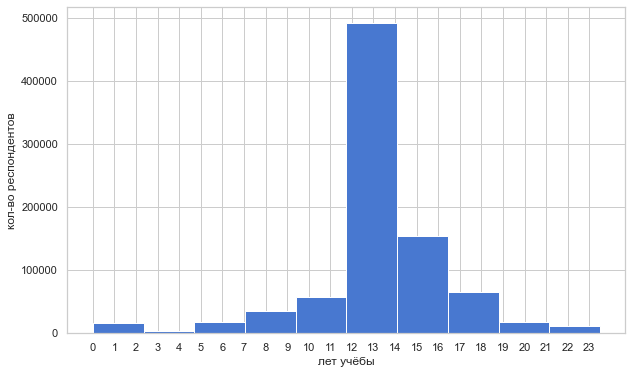

In [109]:
plt.hist(df_dem['EDUC'], bins = 10 )
plt.xlabel('лет учёбы')
plt.ylabel('кол-во респондентов')
plt.xticks(np.arange(0, 23.5, 1.0));

Видим большое число респондентов где-то на уровне около 12-13 лет учёбы, что не удивительно, так как примерно столько и учаться в школе в США. Количество респондентов с более высоким или более низким уровнем образования значительно меньше.

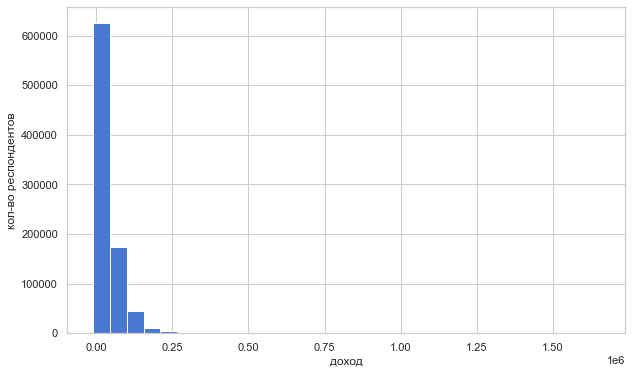

In [110]:
plt.hist(df_dem['INCTOT'], bins = 30)
plt.xlabel('доход')
plt.ylabel('кол-во респондентов');

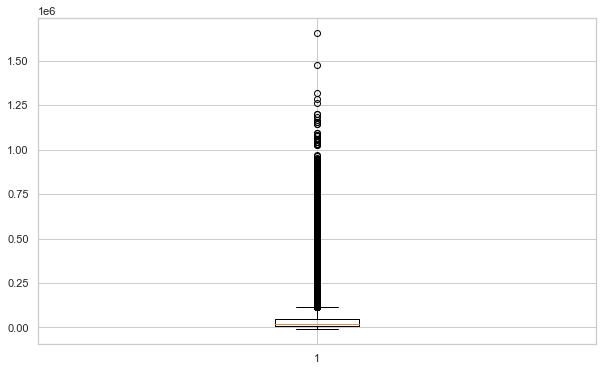

In [111]:
plt.boxplot(df_dem['INCTOT']);

Видим, что разброс дохода очень велик, что немного мешает построению гистограммы. Поэтому для более ясной картинки, построим гистограмму для респондентов с доходом < 150 000

In [72]:
doxod = df_dem[df_dem['INCTOT'] < 150000]

In [73]:
doxod

,EDUC,INCTOT,SEX,AGE,NCHILD,MARST,UHRSWORK
0,11.0,3450,1,56,0,1,5
1,13.5,14000,2,61,0,1,0
3,13.5,35000,1,61,0,4,40
4,8.0,8800,2,52,0,4,0
5,16.0,13200,1,84,0,5,0
...,...,...,...,...,...,...,...
1048570,11.0,0,1,18,0,6,0
1048571,12.5,21400,1,61,1,1,20
1048572,14.0,54000,2,50,1,1,40
1048573,12.0,17900,1,19,0,6,29


In [74]:
df_dem['INCTOT'].mean()

38897.06544173746

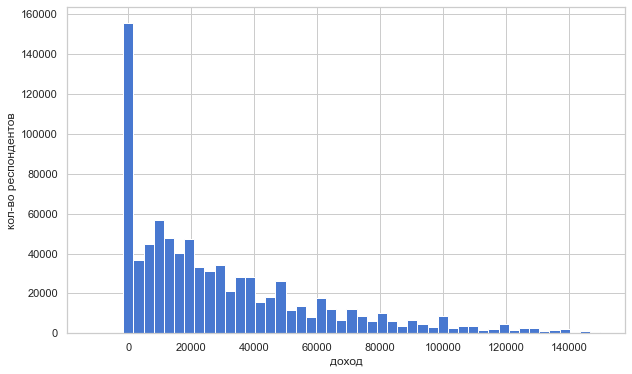

In [112]:
plt.hist(doxod['INCTOT'], bins = 50)
plt.xlabel('доход')
plt.ylabel('кол-во респондентов')
plt.xticks(np.arange(0, 160000, 20000));

Видим, что распределение выглядит вполне адекватно, за исключением огромного числа нулевых значений.

In [77]:
len(df_dem[(df_dem['INCTOT']==0)]) # кол-во респондентов с нулевым доходом

128188

Нулевых значений очень много. Откуда они могли взяться? Возможно, они соответствуют неработающим респондентам? Проверим

In [79]:
len(df_dem[(df_dem['INCTOT']==0) & (df_dem['UHRSWORK'] == 0)]) # кол-во респондентов, которые не работают и имеют нулевой доход

128188

Получается, все респонденты с нулевым доходом - это те, кто не работает. Их не так интересно изучать, так как на них не видно влияния образования на доход. Так что, создадим таблицу, в которой будут только респонденты с доходом > 0 (тех, чей доход < 0 мы тоже рассматривать не будем, к тому же, их достаточно мало)

In [90]:
len(df_dem[df_dem['INCTOT'] > 500000])

1945

Так как респондентов, чей годовой доход > 500 000$ мало, будем считать это выбросом и так же не будем включать их в нашу новую выборку 

In [92]:
df_new = df_dem[(df_dem['INCTOT'] > 0) & (df_dem['INCTOT'] < 500000) ]

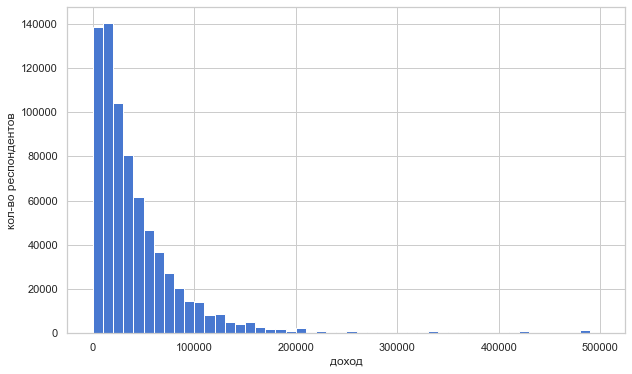

In [113]:
plt.hist(df_new['INCTOT'], bins = 50)
plt.xlabel('доход')
plt.ylabel('кол-во респондентов');


Мы немного подкорректировали нашу выборку, изучив данные по уровню образования и дохода. Теперь попробуем проанализировать зависимость этих двух величин друг от друга

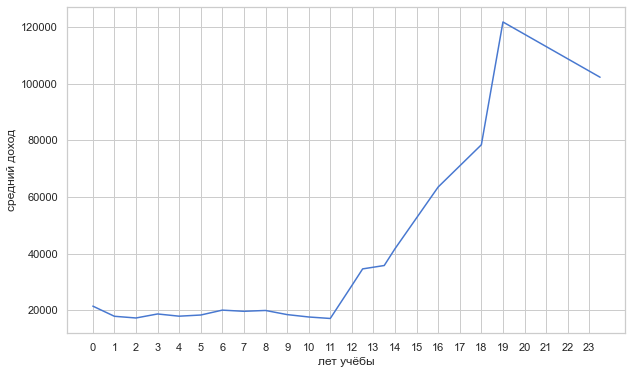

In [114]:
plt.plot(df_new[['EDUC','INCTOT']].groupby(by = 'EDUC').mean())
plt.xticks(np.arange(0, 23.5, 1.0))
plt.xlabel('лет учёбы')
plt.ylabel('средний доход');

Получившуюся картину можно интерпретировать так: 
>Без школьного образования - самый низкий доход, почти не зависящий от количества лет учёбы.

>Окончание школы(12 лет) даёт значительный прирост дохода.

>Даже неоконченное университетсткое образование, в среднем, соотносится с кратным ростом дохода.

>Наибольший доход имеют респонденты, обладающие Магистерской(примерно, 18 лет учёбы суммарно) или профессиональной степенью(Professional degree beyond a bachelor's degree) - примерно, 19 лет учёбы суммарно.

Теперь посмотрим на другие демографические показатели

In [98]:
len(df_new[df_new['SEX'] == 1]) # кол-во мужчин

367336

In [99]:
len(df_new[df_new['SEX'] == 2]) # кол-во женщин

373512

Количесвто представителей каждого пола примерно одинаковое с небольшим перевесом в сторону женщин

Cравним средние доходы мужчин и женщин при одинаковых уровнях образования

In [105]:
df_new_m = df_new[df_new['SEX']==1] # Мужчины
df_new_f = df_new[df_new['SEX']== 2] # Женщины
m_earns = df_new_m[['EDUC','INCTOT']].groupby(by = 'EDUC').mean()# Средние доходы мужчин
f_earns = df_new_f[['EDUC','INCTOT']].groupby(by = 'EDUC').mean()# Средние доходы женщин

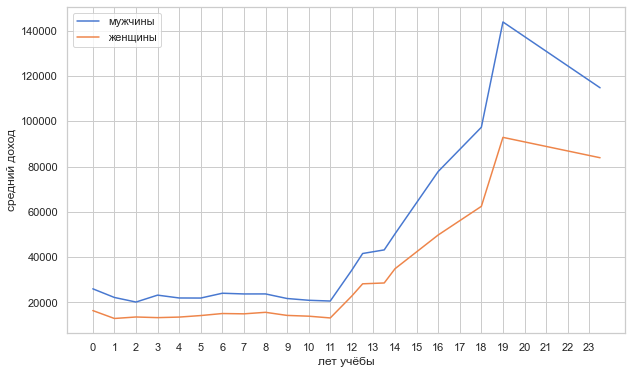

In [115]:
plt.plot(m_earns)
plt.plot(f_earns)
plt.xticks(np.arange(0, 23.5, 1.0))
plt.xlabel('лет учёбы')
plt.ylabel('средний доход')
plt.legend(['мужчины', 'женщины']);

Интересно. А теперь посмотрим на отношение средних доходов женщин к средним доходам мужчин

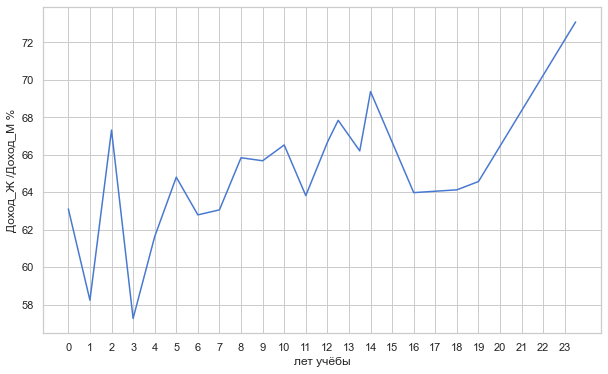

In [116]:
plt.plot(100*(f_earns/m_earns))
plt.xticks(np.arange(0, 23.5, 1.0))
plt.xlabel('лет учёбы')
plt.ylabel('Доход_Ж /Доход_М %'); # Доходы женщин к доходам мужчин в впроцентах

>Женщины, в среднем, на каждом уровне образования получают меньший доход.

>Причём наибольшая процентная разница наблюдается среди респондентов с низким уровнем образования (6 и меньше классов школы)

>Наиболее близки к паритету доходы окончивших школу и имеющих PhD

>У бакалавров и магистров процентная разница вновь возрастает

>На уровне PhD соотношение зарплат стремиться к сокращению разрыва

__Предварительные итоги: Мы определилы примерные тенденции в отношениях между доходом и уровнем образования. Также было примерно определено влияние фактора пола респондента на зависимость дохода от оборазования__

### Гипотезы

>Доход респондента зависит от его пола

>Доход респондента зависит от его образования

__Проведём корреляционный анализ зависимости дохода от образования__

In [153]:
np.corrcoef(df_new['EDUC'], df_new['INCTOT'])

array([[1.        , 0.33512948],
       [0.33512948, 1.        ]])

Сожем наблюдать положительную зависимость

__Проверим гипотезу о зависимости дохода респондента от его пола.__

H0: средний доход мужчины = средний доход женщины

H1: средний доход мужчины != средний доход женщы

Так как наша выборка достаточно велика, можем заключить, что средняя распределена нормально

Используем для проверки гипотезы z - статистику

In [126]:
m = df_new[df_new['SEX']== 1]['INCTOT']
f = df_new[df_new['SEX']== 2]['INCTOT']

In [127]:
m_mean = m.mean()
f_mean = f.mean()

In [128]:
m_var = m.var(ddof = 1)
f_var = f.var(ddof = 1)

In [129]:
z_stat = (m_mean-f_mean) / np.sqrt( (m_var/len(m)) + (f_var/len(f)) )

In [130]:
z_stat

140.0939816224688

In [136]:
z_crit = st.norm.ppf(0.95) # берём правосторонный критерий, так как по предыдущим данным предполагаем, что доход мужчин выше

In [137]:
z_crit

1.6448536269514722

H0 - отвергается

То есть мы имеем статистическое подтверждение того, что пол респондента не не влияет на доход

### Построение ML моделей 

Попробуем предсказать доход респондента на основе количества лет учёбы

In [139]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_new[['EDUC','INCTOT']],test_size =  0.2)

In [140]:
x_train = df_train['EDUC'].to_numpy().reshape(-1,1)
y_train = df_train['INCTOT'].to_numpy().reshape(-1,1)
x_test = df_test['EDUC'].to_numpy().reshape(-1,1)
y_test = df_test['INCTOT'].to_numpy().reshape(-1,1)

In [141]:
from sklearn.linear_model import LinearRegression
model_basic_linear = LinearRegression()

In [142]:
model_basic_linear.fit(x_train,y_train)

LinearRegression()

In [143]:
predict_basic_linear = model_basic_linear.predict(x_test)

In [144]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

In [145]:
print('MAPE = ',mean_absolute_percentage_error(predict_basic_linear,y_test), '\n')
print('MSE = ', mean_squared_error(predict_basic_linear,y_test), '\n')
print('MAE = ', mean_absolute_error(predict_basic_linear,y_test))

MAPE =  0.7952974417730861 

MSE =  2806815901.474794 

MAE =  31732.75435301051


In [150]:
(np.linspace(0,24,100)*model_basic_linear.coef_+ model_basic_linear.intercept_).reshape(-1,1)

100

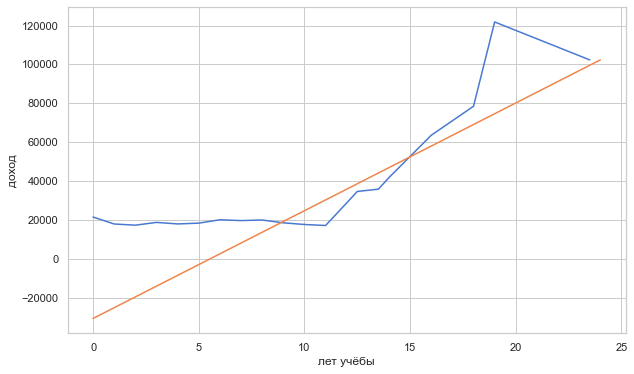

In [152]:
plt.plot(df_new[['EDUC','INCTOT']].groupby(by = 'EDUC').mean()) # Средний доход от лет учёбы
plt.plot(np.linspace(0,24,100), (np.linspace(0,24,100)*model_basic_linear.coef_ + model_basic_linear.intercept_).reshape(-1,1))
plt.xlabel('лет учёбы')
plt.ylabel('доход');
